<a href="https://colab.research.google.com/github/ScottVinay/Image_detection_of_fingers/blob/master/CCTV_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

***
***
# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; CCTV
***
***

<br>
<br>

**Abstract** &emsp;&emsp; Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Risus nullam eget felis eget nunc lobortis. Pharetra et ultrices neque ornare aenean euismod. Dui nunc mattis enim ut tellus. Odio morbi quis commodo odio aenean. Sodales neque sodales ut etiam sit. 

<br>

### Links

- https://medium.com/@jinilcs/a-simple-keras-model-on-my-laptop-webcam-dda77521e6a0
- https://towardsdatascience.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8

## To do

- Choose the cutoff probability for detecting a number of fingers. If none have a high prob, keep measring images until one does.

- Black and white instead of colour?

- Outlines?

## Set-up

In [9]:
import numpy as np
from numpy import array as na
from matplotlib import pyplot as plt
%matplotlib inline

import sys
import os
import cv2
from PIL import Image

from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint

#import warnings
#warnings.filterwarnings('ignore')
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Mounted at /content/drive


In [0]:
imSize = 128

def createModel(typee='cat'):
    if type(typee)!=type('') or typee.lower() not in ['bin','cat']:
        print('Type error')
        return 0
    activ = 'relu'
    inputs = Input(name='inputs',shape=[imSize,imSize,1])
    layer = Conv2D(32,4,name='conv1',activation=activ)(inputs)
    layer = MaxPooling2D(2,2)(layer)
    layer = Conv2D(64,4,name='conv2',activation=activ)(layer)
    layer = MaxPooling2D(2,2)(layer)
    layer = Conv2D(128,4,name='conv3',activation=activ)(layer)
    layer = MaxPooling2D(2,2)(layer)
    layer = Dropout(0.5)(layer)
    layer = Flatten()(layer)
    layer = Dense(64,activation=activ)(layer)
    if typee.lower()=='bin':
        layer = Dense(1,activation='sigmoid')(layer)
        modelLoss = 'binary_crossentropy' 
    elif typee.lower()=='cat':
        layer = Dense(5,activation='softmax')(layer)
        modelLoss = 'categorical_crossentropy'
    model = Model(inputs=inputs,outputs=layer)
    model.compile(optimizer='adam', loss=modelLoss, metrics=['acc'])
    return model
  
model = createModel()

In [12]:
datagen_tr = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
datagen_cv = ImageDataGenerator(rescale=1./255)

path = '/content/drive/My Drive/Python scripts/Data Science/CCTV/'

gen_tr = datagen_tr.flow_from_directory(path+'im_data/train',
                                        target_size=(imSize,imSize),
                                        color_mode='grayscale',
                                        batch_size=10,
                                        class_mode=model.loss[:model.loss.index('_')])
gen_cv = datagen_cv.flow_from_directory(path+'im_data/cv',
                                        target_size=(imSize,imSize),
                                        color_mode='grayscale',
                                        batch_size=10,
                                        class_mode=model.loss[:model.loss.index('_')])

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, 
                              save_weights_only=True,
                              verbose=False)

#!ls {checkpoint_dir}
#model.load_weights(checkpoint_path)

gen_tr.class_indices
gen_cv.class_indices

FileNotFoundError: ignored

## Training

In [0]:
hist = model.fit_generator(gen_tr, epochs=5, 
                    validation_data=gen_cv, validation_steps=7, workers=4, callbacks=[cp_callback])
#model.save('keras_CCTV_model_01.h5')

Epoch 1/5
136/136 [==============================] - 20s 146ms/step - loss: 1.3643 - acc: 0.2765

Consider using a TensorFlow optimizer from `tf.train`.
952/952 [==============================] - 177s 186ms/step - loss: 1.3750 - acc: 0.2666 - val_loss: 1.3643 - val_acc: 0.2765
Epoch 2/5
136/136 [==============================] - 4s 27ms/step - loss: 1.3560 - acc: 0.2765

Consider using a TensorFlow optimizer from `tf.train`.
952/952 [==============================] - 59s 62ms/step - loss: 1.3651 - acc: 0.2712 - val_loss: 1.3560 - val_acc: 0.2765
Epoch 3/5
136/136 [==============================] - 3s 24ms/step - loss: 1.3555 - acc: 0.2787

Consider using a TensorFlow optimizer from `tf.train`.
952/952 [==============================] - 60s 63ms/step - loss: 1.3635 - acc: 0.2742 - val_loss: 1.3555 - val_acc: 0.2787
Epoch 4/5
136/136 [==============================] - 3s 25ms/step - loss: 1.3548 - acc: 0.2824

Consider using a TensorFlow optimizer from `tf.train`.
952/952 [==============

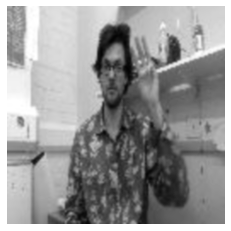

In [0]:
im = cv2.imread('/content/drive/My Drive/Python scripts/Data Science/CCTV/data/train/finger_3/100.jpg')
im = cv2.imread(path+'data/test/finger_3/{}.jpg'.format(500),cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]);
plt.yticks([]);
plt.show()

In [0]:
for i in range(1,501,25):
  path = '/content/drive/My Drive/Python scripts/Data Science/CCTV/'
  X = cv2.imread(path+'data/test/finger_4/{}.jpg'.format(i),cv2.IMREAD_GRAYSCALE)
  X = np.expand_dims(X, axis=0)
  X = np.expand_dims(X, axis=3)
  yp = model.predict(X)
  print(yp)

[[1. 0. 0. 0.]]
[[0. 0. 0. 1.]]
[[0. 0. 0. 1.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]
[[1. 0. 0. 0.]]


In [0]:
np.argmax(yp)

0

## Localisation